In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 666 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                 title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           1944        190  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data               763KB  2023-11-21 17:56:32           8709        153  1.0              
everydaycodings/produce-prices-dataset                              Fruits and Vegetables Prices Dataset        232KB  2023-12-11 13:40:33           1371         29  1.0              
thedevastator/books-sales-and-ratings                               Books Sales 

In [ ]:
!kaggle datasets download -d willianoliveiragibin/fatalities-in-the-israeli-palestinian

  0% 0.00/463k [00:00<?, ?B/s]
100% 463k/463k [00:00<00:00, 91.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import shutil
import zipfile
import pathlib

import folium

In [ ]:
local_zip = "fatalities-in-the-israeli-palestinian.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
df = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [ ]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [ ]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


***.drop()*** menghapus colom dari notes.Argumen **inplace** menentukan apakah penghapusan akan dilakukan di tempat atau menghasilkan DataFrame baru. Jika **inplace=True**, maka penghapusan akan dilakukan di tempat dan DataFrame df akan diubah. Jika **inplace=False**, maka penghapusan akan menghasilkan DataFrame baru dan DataFrame df akan tetap sama. Argumen ***axis*** menentukan apakah penghapusan akan dilakukan pada baris atau kolom. Jika **axis=0**, maka penghapusan akan dilakukan pada baris. Jika **axis=1**, maka penghapusan akan dilakukan pada kolom.

In [ ]:
df.drop('notes', inplace=True, axis=1)

code di bawah ini digunakan untuk menangani nilai yang hilang pada colom age, dan mengisi kolom yang hilang dengan milai rata-rata dari age. begitu menurut saya hehe.

In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)

code dibawah ini digunakan untuk menangani nilai yang hilang pada colom gender dan mengisi dengan nilai modus (nilai yang paling sering muncul) dan diganti dengan nilai modus pertama dalam indexs[0] untuk mendapat nilai modus saja.

In [ ]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [ ]:
df.dropna(subset=['took_part_in_the_hostilities'], inplace=True)

In [ ]:
df['place_of_residence'].fillna('Unknown', inplace=True)
df['place_of_residence_district'].fillna('Unknown', inplace=True)

In [ ]:
df['type_of_injury'].fillna('Not Specified', inplace=True)
df['ammunition'].fillna('Not Specified', inplace=True)


untuk memeriksa apakah ada data yang, karna nilai yang tampil adalah 0, yang berarti tidak ada data yang hilang.

In [ ]:
print(df.isnull().sum())

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
dtype: int64


fungsi dari pd.to_datetime adalah mengubah colom.

In [ ]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

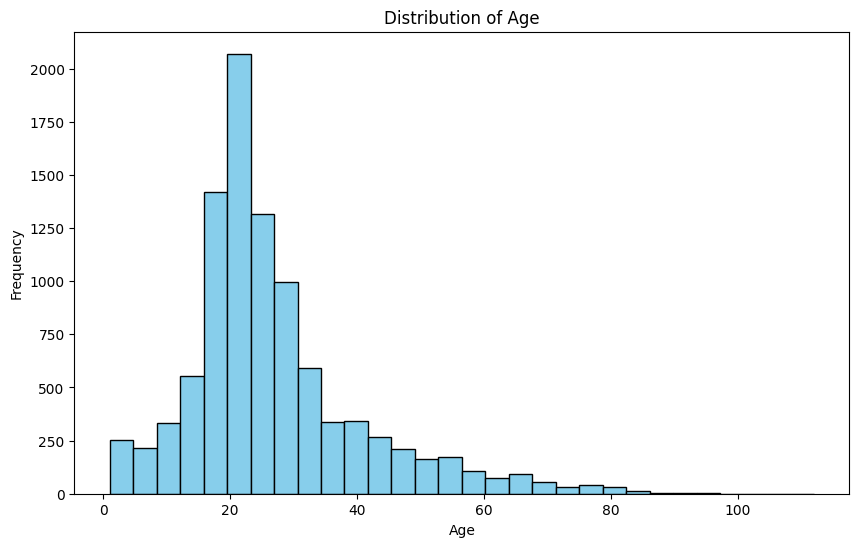

In [ ]:
# menampilkan visual umur orang-orang yang meninggal di palestina
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# dari data ini menampilkan bahwa genersi muda dan anak anak yang merupakan korban terbesar
# umur mereka adalah 15 sampai 30 tahun

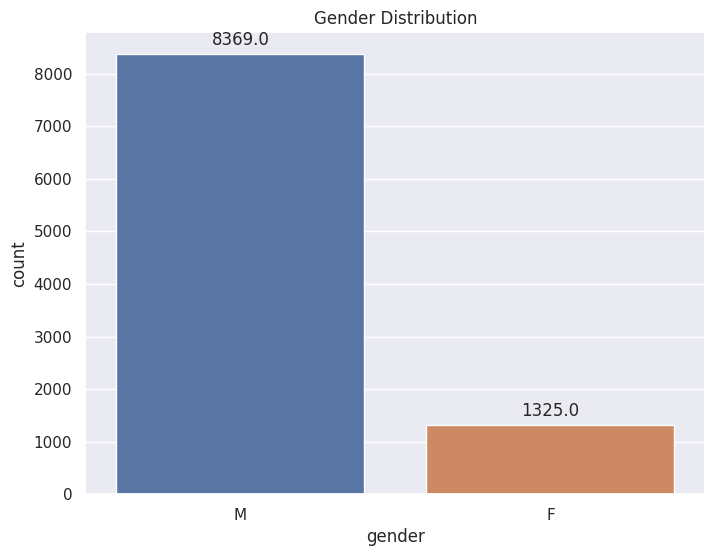

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")


ax = sns.countplot(x='gender', data=df)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution')
plt.show()

In [ ]:
citizenship_counts = df['citizenship'].value_counts()

dari data ini kita bisa melihat bahwa mayoritas korban tewas adalah warga palistina, yang diwakili dengan 92% total korban

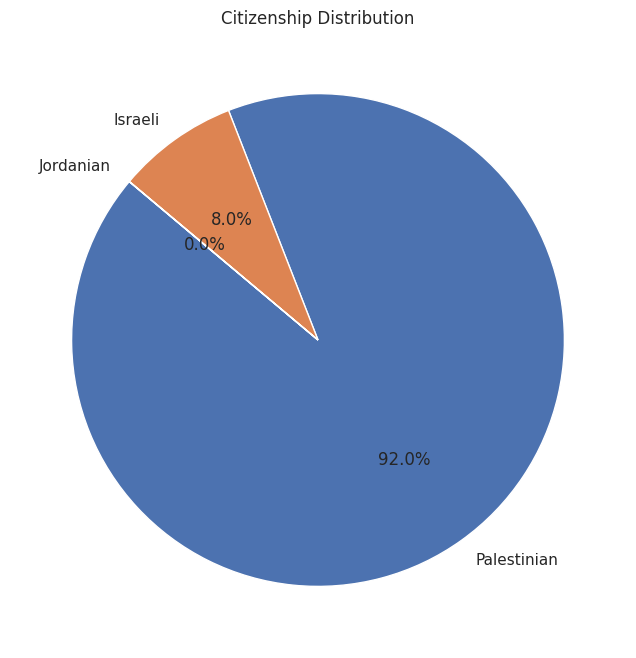

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Citizenship Distribution')
plt.show()

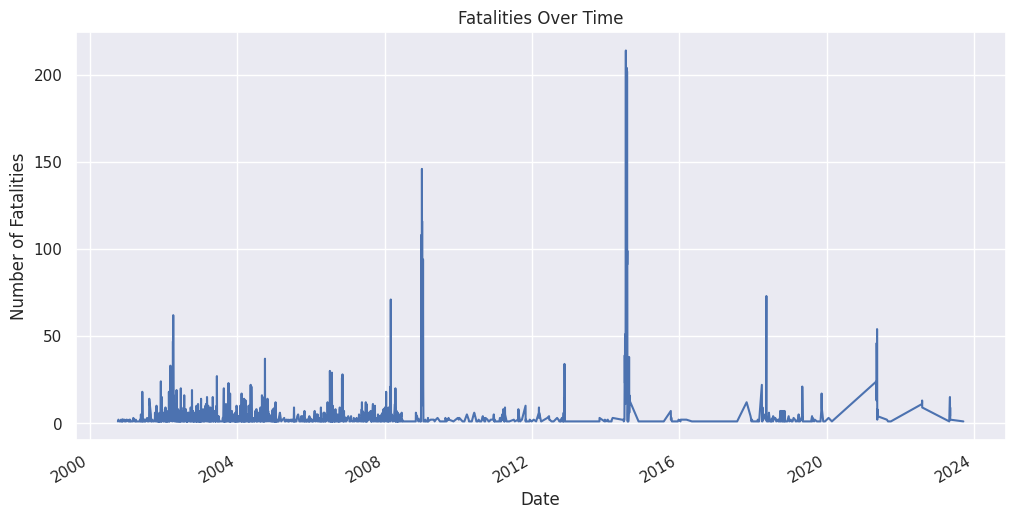

In [ ]:
# mengelompokan berdasarkan tanggal dan hitung jumlah korban jiwa
fatalities_over_time = df.groupby('date_of_event').size()

# Create a time series plot
plt.figure(figsize=(12, 6))
fatalities_over_time.plot()
plt.title('Fatalities Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.show()

Data di bawah ini menampilkan dari tahun 2000 sampai 2020

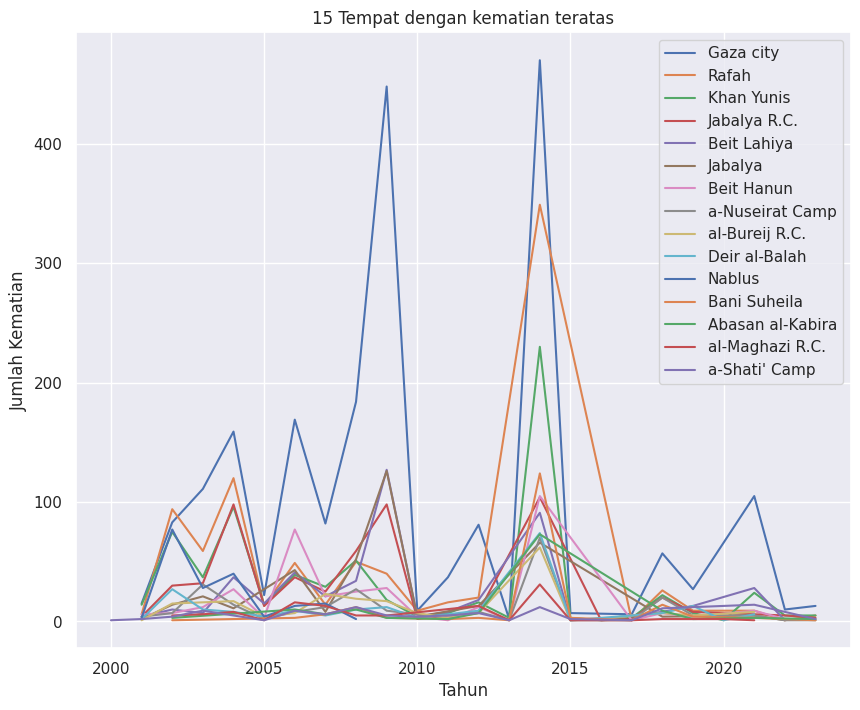

In [ ]:
df['year'] = df['date_of_event'].dt.year


top_n_places = 15


top_places = df['place_of_residence'].value_counts().nlargest(top_n_places).index


filtered_data = df[df['place_of_residence'].isin(top_places)]


fatalities_by_place = filtered_data.groupby(['place_of_residence', 'year']).size().reset_index(name='fatalities_count')


plt.figure(figsize=(10, 8))

for place in top_places:
    data = fatalities_by_place[fatalities_by_place['place_of_residence'] == place]
    plt.plot(data['year'], data['fatalities_count'], label=place)

plt.title(f'{top_n_places} Tempat dengan kematian teratas')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.show()


In [ ]:
# menampilkan koordinat kota berdasarkan koordinat Google Maps
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286]
}

# menampikan jumlah kematian untuk setiap kota
district_fatalities = df.groupby('event_location_district').size()

# menampikan warna berdasarkan korban jiwa
def get_color(fatalities):
    if fatalities > 500:
        return 'darkred'
    elif fatalities > 100:
        return 'red'
    elif fatalities > 50:
        return 'orange'
    else:
        return 'green'

#membuat peta
m = folium.Map(location=[31.5, 34.75], zoom_start=8, tiles='OpenStreetMap')

# menambahkan tanda pada titik tempat yang ada di dalam Koordinat
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(
        location=coords,
        tooltip=f'{district}: {fatalities} fatalities',
        icon=None
    ).add_to(m)
    folium.Circle(
        location=coords,
        radius=np.sqrt(fatalities) * 1000,  # skala radius untuk visualisasi yang lebih baik
        color=get_color(fatalities),
        fill=True,
        fill_color=get_color(fatalities),
        fill_opacity=0.6,
    ).add_to(m)

# agar layar Maps dapat di Kontrol
folium.LayerControl().add_to(m)

m


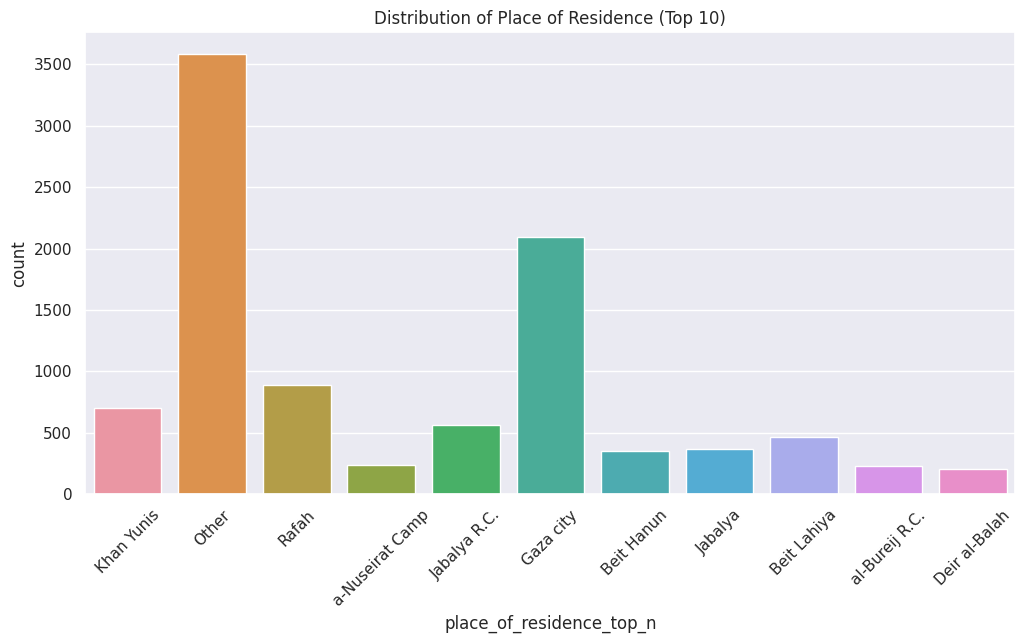

In [ ]:
# Categorical Analysis - Place of Residence (Top N)
top_n = 10  # Set the number of top categories to display

# Get the top N categories
top_n_categories = df['place_of_residence'].value_counts().nlargest(top_n).index

# Replace less frequent categories with 'Other'
df['place_of_residence_top_n'] = df['place_of_residence'].apply(lambda x: x if x in top_n_categories else 'Other')

plt.figure(figsize=(12, 6))
sns.countplot(x='place_of_residence_top_n', data=df)
plt.title('Distribution of Place of Residence (Top {})'.format(top_n))
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Count the number of occurrences for each category in 'took_part_in_the_hostilities'
participation_counts = df['took_part_in_the_hostilities'].value_counts()
participation_counts

No                            4653
Yes                           3467
Israelis                       771
Unknown                        603
Object of targeted killing     200
Name: took_part_in_the_hostilities, dtype: int64

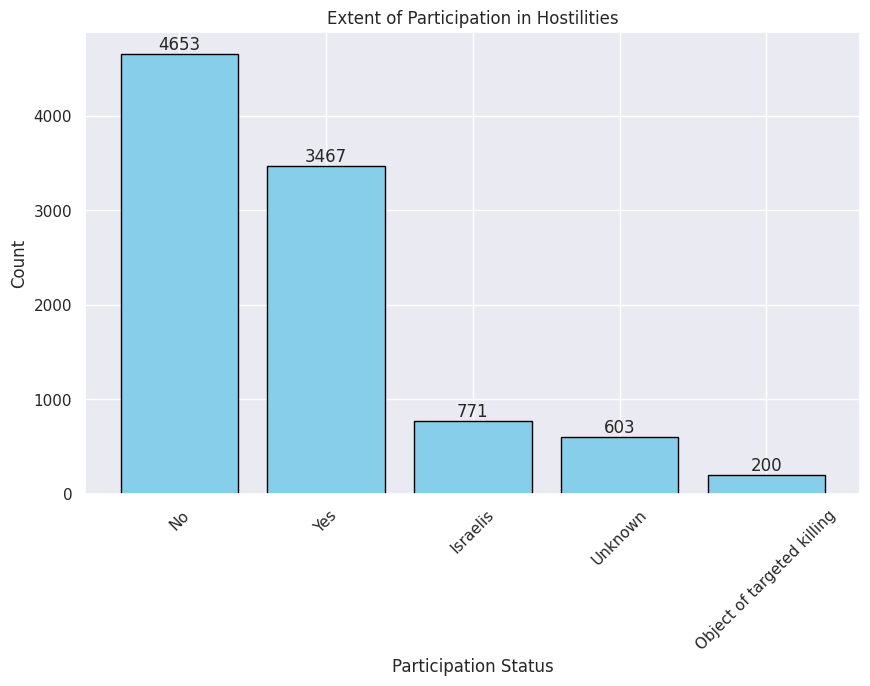

In [ ]:
# Create a bar plot to visualize the extent of participation
plt.figure(figsize=(10, 6))
plt.bar(participation_counts.index, participation_counts.values, color='skyblue', edgecolor='black')

for i, count in enumerate(participation_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.title('Extent of Participation in Hostilities')
plt.xlabel('Participation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count the occurrences of each type of injury
injury_counts = df['type_of_injury'].value_counts()
print(injury_counts)

gunfire             8785
explosion            505
Not Specified        280
shelling              65
house demolition      25
stabbing              18
beating                7
stones throwing        4
hit by a vehicle       4
fire                   1
Name: type_of_injury, dtype: int64


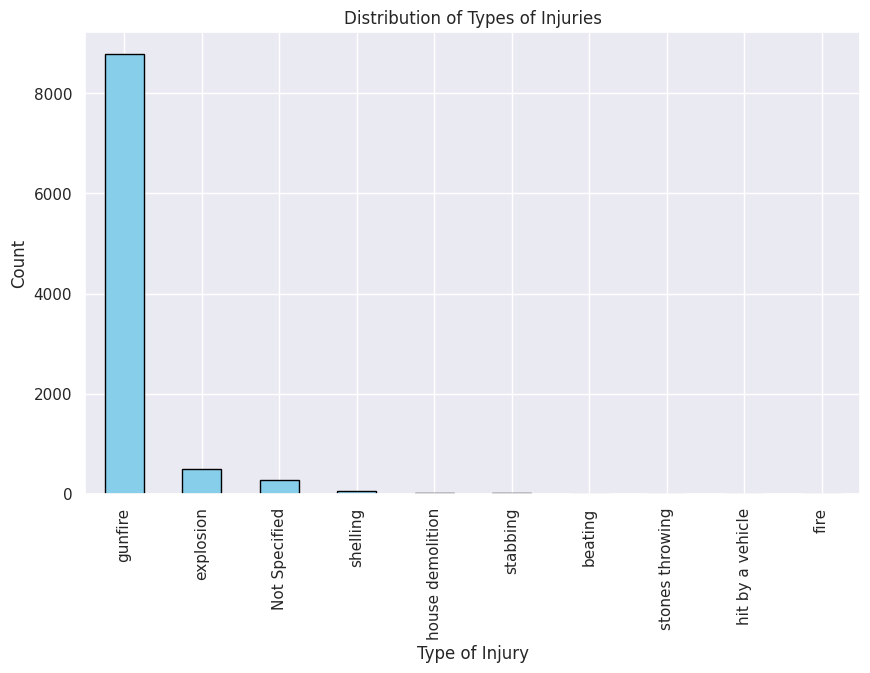

In [ ]:
plt.figure(figsize=(10, 6))
injury_counts.plot(kind='bar', color='skyblue',edgecolor='black')
plt.title('Distribution of Types of Injuries')
plt.xlabel('Type of Injury')
plt.ylabel('Count')
plt.show()

In [ ]:
# Count the occurrences of each type of ammunition and means of killing
ammunition_counts = df['ammunition'].value_counts()
means_of_killing_counts = df['killed_by'].value_counts()

print("Ammunition used:")
print(ammunition_counts)

print("\nMeans of killing:")
print(means_of_killing_counts)

Ammunition used:
Not Specified                  4888
missile                        2847
shell                           675
live ammunition                 606
explosive belt                  315
bomb                            213
mortar fire                      43
flechette shells                 22
phosphorus shell                 16
car bomb                         15
knife                            14
rubber-coated metal bullets      13
teargas canister                 11
Qassam rocket                     7
grad rocket                       5
grenade                           2
flare bomb                        1
stun grenade                      1
Name: ammunition, dtype: int64

Means of killing:
Israeli security forces    8876
Palestinian civilians       771
Israeli civilians            47
Name: killed_by, dtype: int64


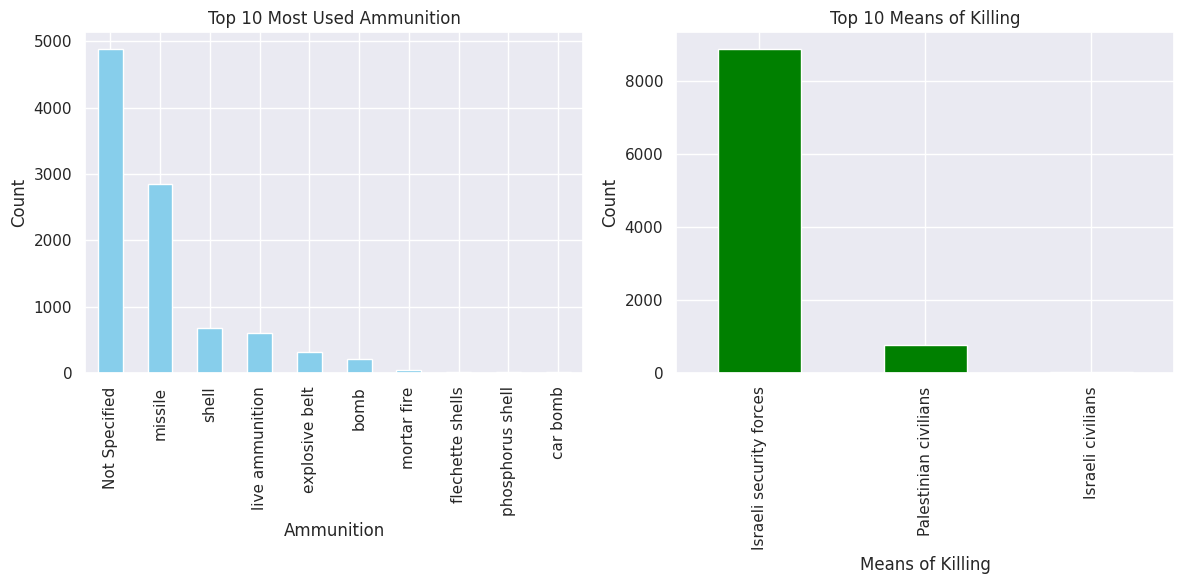

In [ ]:
plt.figure(figsize=(12, 6))

# Plot ammunition
plt.subplot(1, 2, 1)
ammunition_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Used Ammunition')
plt.xlabel('Ammunition')
plt.ylabel('Count')

# Plot means of killing
plt.subplot(1, 2, 2)
means_of_killing_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Means of Killing')
plt.xlabel('Means of Killing')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Generate victim profiles based on age, gender, citizenship, and place of residence
victim_profiles = df[['age', 'gender', 'citizenship', 'place_of_residence']].copy()

# Display the first few rows of victim profiles
print(victim_profiles.head())

     age gender  citizenship place_of_residence
6   24.0      M  Palestinian         Khan Yunis
94  51.0      M  Palestinian      a-Shati' Camp
95  33.0      M  Palestinian      a-Shati' Camp
96  49.0      M  Palestinian         Khan Yunis
98  25.0      M  Palestinian              Rafah


In [ ]:
# Analyze common characteristics
common_age_range = victim_profiles['age'].value_counts().idxmax()
common_gender = victim_profiles['gender'].value_counts().idxmax()
common_citizenship = victim_profiles['citizenship'].value_counts().idxmax()
common_place_of_residence = victim_profiles['place_of_residence'].value_counts().idxmax()

print(f"\nCommon Characteristics Among Victims:")
print(f"Most Common Age Range: {common_age_range}")
print(f"Most Common Gender: {common_gender}")
print(f"Most Common Citizenship: {common_citizenship}")
print(f"Most Common Place of Residence: {common_place_of_residence}")


Common Characteristics Among Victims:
Most Common Age Range: 22.0
Most Common Gender: M
Most Common Citizenship: Palestinian
Most Common Place of Residence: Gaza city


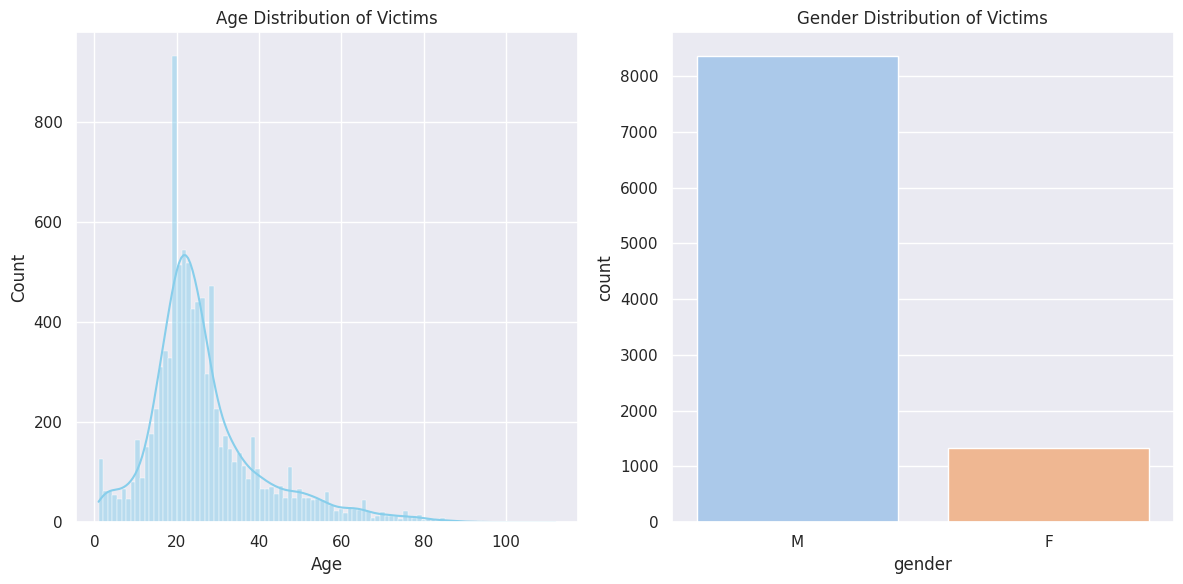

In [ ]:
plt.figure(figsize=(12, 6))

# Plot Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(victim_profiles['age'], kde=True, color='skyblue')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')

# Plot Gender Distribution
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=victim_profiles, palette='pastel')
plt.title('Gender Distribution of Victims')

plt.tight_layout()
plt.show()

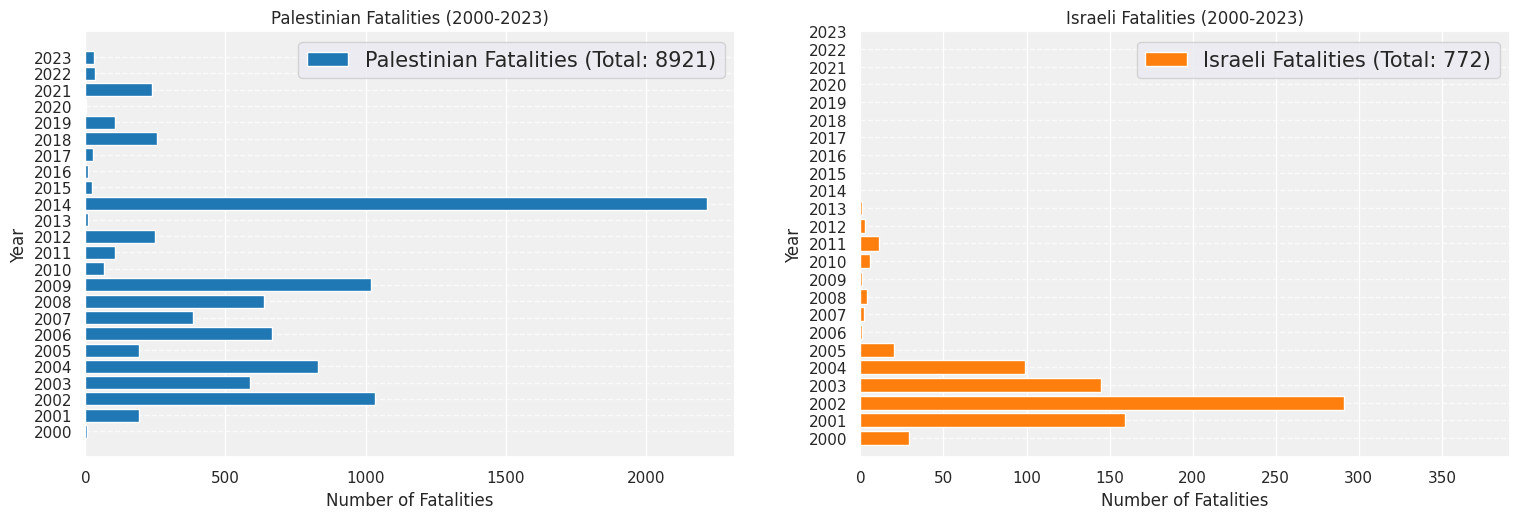

In [ ]:
# Create subplots with enhanced styling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define custom colors
palestinian_color = '#1f77b4'  # Blue color for Palestinian chart
israeli_color = '#ff7f0e'      # Orange color for Israeli chart
total_text_color = '#2ca02c'  # Green color for total text

# Plot for Palestinian fatalities
palestinian_data = df[df['citizenship'] == 'Palestinian']

palestinian_fatalities_per_year = palestinian_data.groupby(palestinian_data['date_of_event'].dt.year)['name'].count()
axes[0].barh(palestinian_fatalities_per_year.index, palestinian_fatalities_per_year.values, color=palestinian_color)
axes[0].set_xlim(0, max(palestinian_fatalities_per_year.values) + 100)  # Adjust the x-limit
axes[0].set_xlabel('Number of Fatalities')
axes[0].set_ylabel('Year')
axes[0].set_title('Palestinian Fatalities (2000-2023)')

# Plot for Israeli fatalities
israeli_data = df[df['citizenship'] == 'Israeli']

israeli_fatalities_per_year = israeli_data.groupby(israeli_data['date_of_event'].dt.year)['name'].count()
axes[1].barh(israeli_fatalities_per_year.index, israeli_fatalities_per_year.values, color=israeli_color)
axes[1].set_xlim(0, max(israeli_fatalities_per_year.values) + 100)  # Set x-axis limits from 0 to max fatalities
axes[1].set_xlabel('Number of Fatalities')
axes[1].set_ylabel('Year')
axes[1].set_title('Israeli Fatalities (2000-2023)')

# Set y-axis labels with years
years = range(2000, 2024)
axes[0].set_yticks(years)
axes[0].set_yticklabels([str(year) for year in years])
axes[1].set_yticks(years)
axes[1].set_yticklabels([str(year) for year in years])

# Add a legend with total number of Palestinian fatalities
total_palestinian_fatalities = palestinian_fatalities_per_year.sum()
axes[0].legend(['Palestinian Fatalities (Total: {})'.format(total_palestinian_fatalities)], loc='upper right', fontsize=15)

# Add a legend with total number of Israeli fatalities
total_israeli_fatalities = israeli_fatalities_per_year.sum()
axes[1].legend(['Israeli Fatalities (Total: {})'.format(total_israeli_fatalities)], loc='upper right', fontsize=15)

# Add a horizontal grid for better readability
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color to the plots for better contrast
axes[0].set_facecolor('#f0f0f0')
axes[1].set_facecolor('#f0f0f0')

# Adjust layout and spacing
plt.tight_layout(pad=3)

# Show the plot
plt.show()

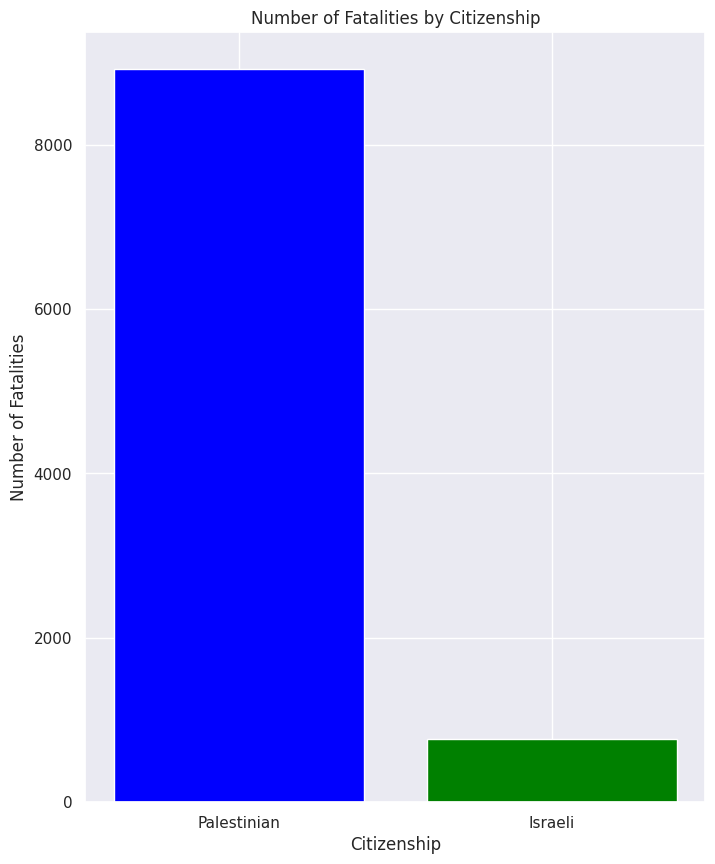

In [ ]:
# Filter data for Palestinian and Israeli citizenship
palestinian_fatalities = df[df['citizenship'] == 'Palestinian']['name'].count()
israeli_fatalities = df[df['citizenship'] == 'Israeli']['name'].count()

# Create a bar chart
citizenship = ['Palestinian', 'Israeli']
fatalities = [palestinian_fatalities, israeli_fatalities]

plt.figure(figsize=(8, 10))
plt.bar(citizenship, fatalities, color=['blue', 'green']) #This number of Palestinian martyrs doubled in the period from 7/10/2023 until the issuance of this notebook
plt.title('Number of Fatalities by Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Number of Fatalities')
plt.show()